In [1]:
import numpy as np
import PIL
import tensorflow as tf
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor,dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0]==1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [11]:
def image_to_tensor(path_to_image):
  img = tf.io.read_file(path_to_image)
  img = tf.image.decode_image(img, channels=3, dtype=tf.float32)

  img = tf.image.resize(img, [768,512])
  img = img[tf.newaxis, :]
  return img

In [12]:
person = image_to_tensor('/content/1.jpg')
style = image_to_tensor('/content/style.jpg')

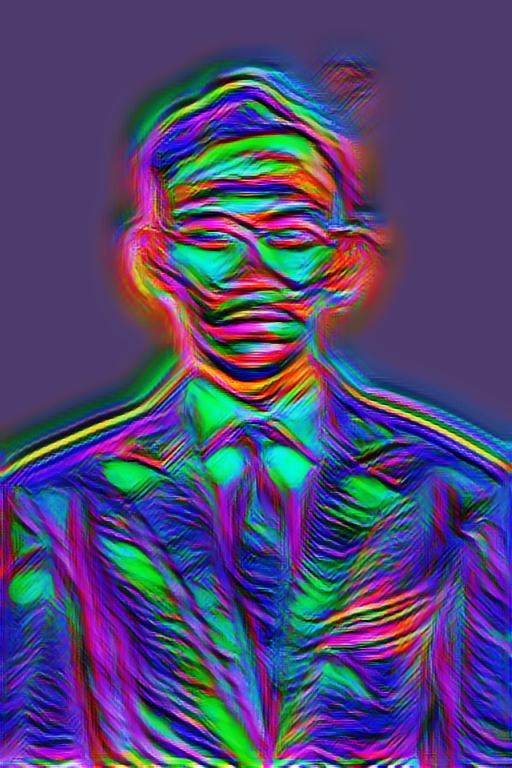

In [13]:
import tensorflow_hub as hub
import time
import functools

hub_module=hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/1')
stylized_image = hub_module(tf.constant(person),tf.constant(style))[0]
tensor_to_image(stylized_image)